In [29]:
import sys
sys.path.append("../") # adding the path to read the utils file
import pandas as pd
from utils import *
import networkx as nx

pd.set_option('display.max_columns', None)

In [30]:
# you should run making_hikari2022_csv.ipynb before running this cell, since the two csv given with the paper have two differences
# to see what are the data types and the features of the dataset, you can take a look on the utils file
ds = pd.concat([
    pd.read_csv('../datasets/HIKARI-2021/ALLFLOWMETER_HIKARI2021.csv', dtype=dtype_hikari, usecols=selected_features_hikari),
    pd.read_csv('../datasets/HIKARI-2021/ALLFLOWMETER_HIKARI2022.csv', dtype=dtype_hikari, usecols=selected_features_hikari)],
    ignore_index=True)
ds.head()

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,2.207588,15,14,6,6,6.794746,6.341763,13.136509,0.933333,464,20,40,492,32,44,2,2,2,6,5,26,0,0,0,0,0,742,1826.0,121.733333,220.736581,0,1448,5025.0,358.928571,552.239840,0,1448,6851.0,236.241379,424.859275,18.119812,1.963762e+06,2.207603e+06,1.576859e+05,5.205052e+05,7.867813,2.032929e+06,2.177950e+06,1.675346e+05,5.606267e+05,7.867813,1.963762e+06,2.207603e+06,78842.963491,3.696378e+05,3103.387105,7.5,7.0,913.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.207603e+06,2.207603e+06,2.207603e+06,2.207603e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,True
1,15.624266,15,14,6,6,0.960045,0.896042,1.856087,0.933333,488,20,44,468,32,44,2,2,2,6,5,26,0,0,0,0,0,745,1829.0,121.933333,221.339257,0,1448,5025.0,358.928571,552.239840,0,1448,6854.0,236.344828,424.987166,20.980835,1.534300e+07,1.562428e+07,1.116020e+06,4.094889e+06,20.980835,1.541144e+07,1.559517e+07,1.199628e+06,4.270148e+06,10.013580,1.534300e+07,1.562428e+07,558009.896960,2.897622e+06,438.676603,7.5,7.0,914.5,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.883792e+04,2.524381e+05,2.812760e+05,1.406380e+05,158109.181742,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,True
2,12.203357,14,13,6,5,1.147225,1.065281,2.212506,0.928571,432,20,40,448,32,44,2,2,2,6,5,24,0,0,0,0,0,744,1828.0,130.571429,226.803444,0,2896,5025.0,386.538462,817.479013,0,2896,6853.0,253.814815,592.570284,36.001205,1.196814e+07,1.220338e+07,9.387216e+05,3.314032e+06,15.020370,1.203674e+07,1.217482e+07,1.014569e+06,3.471107e+06,15.020370,1.196814e+07,1.220338e+07,469360.810060,2.345336e+06,561.566789,7.0,6.5,914.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.891302e+04,2.063251e+05,2.352381e+05,1.176190e+05,125449.251656,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,True
3,9.992448,14,13,6,5,1.401058,1.300983,2.702041,0.928571,432,20,40,436,32,44,2,2,2,6,5,24,0,0,0,0,0,744,1828.0,130.571429,226.803444,0,2896,5025.0,386.538462,817.479013,0,2896,6853.0,253.814815,592.570284,50.067902,9.759205e+06,9.992470e+06,7.686515e+05,2.701448e+06,20.980835,9.828447e+06,9.963348e+06,8.302790e+05,2.833716e+06,20.980835,9.759205e+06,9.992470e+06,384325.770231,1.912152e+06,685.817940,7.0,6.5,914.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.952909e+04,2.037361e+05,2.332652e+05,1.166326e+05,123182.931318,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,True
4,7.780611,14,14,6,5,1.799345,1.799345,3.598689,1.000000,432,20,40,480,32,44,2,2,2,6,5,25,0,0,0,0,0,744,1828.0,130.571429,226.803444,0,2896,5025.0,358.928571,792.173394,0,2896,6853.0,244.750000,583.468215,16.927719,7.545305e+06,7.780620e+06,5.985092e+

In [31]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783531 entries, 0 to 783530
Data columns (total 81 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   flow_duration             783531 non-null  float64
 1   fwd_pkts_tot              783531 non-null  uint64 
 2   bwd_pkts_tot              783531 non-null  uint64 
 3   fwd_data_pkts_tot         783531 non-null  uint64 
 4   bwd_data_pkts_tot         783531 non-null  uint64 
 5   fwd_pkts_per_sec          783531 non-null  float64
 6   bwd_pkts_per_sec          783531 non-null  float64
 7   flow_pkts_per_sec         783531 non-null  float64
 8   down_up_ratio             783531 non-null  float32
 9   fwd_header_size_tot       783531 non-null  uint64 
 10  fwd_header_size_min       783531 non-null  uint8  
 11  fwd_header_size_max       783531 non-null  uint8  
 12  bwd_header_size_tot       783531 non-null  uint64 
 13  bwd_header_size_min       783531 non-null  u

Bisogna controllare tutti gli interi ma anche i bulk_packets

In [5]:
ds.describe()

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,5.552780e+05,555278.000000,555278.000000,5.552780e+05,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,5.552780e+05,555278.000000,555278.000000,555278.000000,555278.000000,5.552780e+05,555278.000000,555278.000000,555278.000000,555278.000000,5.552780e+05,555278.000000,555278.000000,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,555278.000000,555278.000000,555278.000000,5.552780e+05,555278.000000,5.552780e+05,555278.000000,555278.000000,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,555278.000000,555278.000000,555278.000000
mean,9.306544,18.264091,18.892578,7.956928,15.803417,1720.704202,1674.140666,3394.844869,0.887003,6.361381e+02,19.901433,24.607501,5.754280e+02,16.545190,19.689366,0.562095,0.923988,0.503098,7.084219,10.782839,34.937831,0.001439,0.000011,0.002329,0.000038,22.699050,207.591415,1.872353e+03,52.682038,56.488003,31.246709,1252.857824,2.659391e+04,309.276711,363.239480,22.705447,1263.603752,2.846627e+04,186.045581,299.247061,8.932046e+05,5.102050e+06,9.134269e+06,1.190675e+06,9.329549e+05,1.528412e+04,4.232945e+06,7.234529e+06,3.454519e+05,9.634418e+05,8.937461e+05,5.202171e+06,9.312579e+06,1.080620e+06,7.082713e+05,3.516315e+04,12.653119,13.143448,1507.875699,1.592495e+04,18.984345,6.423852e+03,0.030403,2.513407,1.248447e+03,5.797473e+06,6.405506e+05,8.806241e+05,9.996375e+05,7.352865e+05,1.335883e+05,3.490637e+06,5.000630e+06,8.312942e+06,4.073219e+06,7.992576e+05,14750.725718,21005.879513,4546.872210
std,101.802730,463.901484,469.078877,73.441224,467.349374,4994.579973,4548.503983,9316.856663,0.511737,1.762560e+04,12.524893,16.577095,1.495092e+04,12.151789,15.924656,0.825811,1.018941,0.898075,73.276271,173.178129,932.467347,0.038844,0.003287,0.057376,0.006710,33.855436,287.060480,2.229359e+04,53.300571,89.671573,48.048751,2778.113834,4.004711e+05,569.643855,648.563051,33.867741,2774.930843,4.038744e+05,286.173780,524.095261,7.145073e+06,2.315940e+07,1.017571e+08,7.273388e+06,4.779988e+06,2.570718e+05,2.217501e+07,7.332596e+07,1.682992e+06,4.913081e+06,7.144566e+06,2.323061e+07,1.018055e+08,7.190908e+06,3.437376e+06,2.183837e+05,85.057715,89.297659,17077.706573,1.484343e+05,872.755605,

We can notice that some of the int columns have a very low mean around 0, so I will take a look at the distribution of these columns.

In [6]:
ds.select_dtypes(include=['uint']).describe().T

,count,mean,std,min,25%,50%,75%,max
fwd_pkts_tot,555278.0,18.264091,463.901484,0.0,1.0,2.0,10.0,326292.0
bwd_pkts_tot,555278.0,18.892578,469.078877,0.0,1.0,2.0,12.0,326827.0
fwd_data_pkts_tot,555278.0,7.956928,73.441224,0.0,1.0,2.0,3.0,3953.0
bwd_data_pkts_tot,555278.0,15.803417,467.349374,0.0,0.0,2.0,5.0,326822.0
fwd_header_size_tot,555278.0,636.138064,17625.601602,0.0,16.0,28.0,328.0,12420104.0
bwd_header_size_tot,555278.0,575.428005,14950.919584,0.0,8.0,16.0,368.0,10458472.0
flow_FIN_flag_count,555278.0,0.562095,0.825811,0.0,0.0,0.0,1.0,15.0
flow_SYN_flag_count,555278.0,0.923988,1.018941,0.0,0.0,1.0,2.0,23.0
flow_RST_flag_count,555278.0,0.503098,0.898075,0.0,0.0,0.0,1.0,110.0
fwd_PSH_flag_count,555278.0,7.084219,73.276271,0.0,0.0,0.0,3.0,3953.0


Analysis of fwd_URG_flag_count

In [7]:
ds.fwd_URG_flag_count.value_counts()

fwd_URG_flag_count
0    554493
1       776
2         5
3         3
4         1
Name: count, dtype: int64

All the values above 0 aren't an attack, so seems like everything abouve 0 isn't an attack

In [8]:
ds[ds.fwd_URG_flag_count > 0].Label.value_counts()

Label
False    785
Name: count, dtype: int64

In [9]:
ds[ds.fwd_URG_flag_count == 0].Label.value_counts()

Label
False    516797
True      37696
Name: count, dtype: int64

Analysis of bwd_URG_flag_count

In [10]:
ds.bwd_URG_flag_count.value_counts()

bwd_URG_flag_count
0    555272
1         6
Name: count, dtype: int64

Same here, maybe it make sense to aggregate them into one column

In [11]:
ds[ds.bwd_URG_flag_count > 0].Label.value_counts()

Label
False    6
Name: count, dtype: int64

In [12]:
ds[ds.bwd_URG_flag_count == 0].Label.value_counts()

Label
False    517576
True      37696
Name: count, dtype: int64

Analysis of flow_CWR_flag_count

In [13]:
ds.flow_CWR_flag_count.value_counts()

flow_CWR_flag_count
0    554205
1       895
2       143
3        28
4         7
Name: count, dtype: int64

In [14]:
ds[ds.flow_CWR_flag_count > 0].Label.value_counts()

Label
False    1073
Name: count, dtype: int64

In [15]:
ds[ds.flow_CWR_flag_count == 0].Label.value_counts()

Label
False    516509
True      37696
Name: count, dtype: int64

Analysis of flow_ECE_flag_count

In [16]:
ds.flow_ECE_flag_count.value_counts()

flow_ECE_flag_count
0    555259
1        17
2         2
Name: count, dtype: int64

In [17]:
ds[ds.flow_ECE_flag_count > 0].Label.value_counts()

Label
False    19
Name: count, dtype: int64

In [18]:
ds[ds.flow_ECE_flag_count == 0].Label.value_counts()

Label
False    517563
True      37696
Name: count, dtype: int64

Analysis of flow_FIN_flag_count

In [19]:
ds.flow_FIN_flag_count.value_counts()

flow_FIN_flag_count
0     359461
2     111261
1      82446
3       1750
4        127
5        105
6         79
7         34
8          5
10         3
14         2
9          2
12         1
13         1
15         1
Name: count, dtype: int64

In [20]:
ds[ds.flow_FIN_flag_count > 0].Label.value_counts()

Label
False    161407
True      34410
Name: count, dtype: int64

In [21]:
ds[ds.flow_FIN_flag_count == 0].Label.value_counts()

Label
False    356175
True       3286
Name: count, dtype: int64

Analysis of flow_RST_flag_count

In [22]:
ds.flow_RST_flag_count.value_counts()

flow_RST_flag_count
0      353816
1      143240
2       43780
3       12063
4        1711
5         382
6         153
8          29
7          21
9          12
11          8
12          8
10          6
15          4
21          4
14          3
54          3
85          2
19          2
18          2
62          2
16          2
17          2
53          1
23          1
46          1
33          1
101         1
110         1
20          1
64          1
56          1
32          1
50          1
61          1
81          1
63          1
42          1
82          1
40          1
76          1
58          1
26          1
31          1
13          1
24          1
Name: count, dtype: int64

In [23]:
ds[ds.flow_FIN_flag_count > 0].Label.value_counts()

Label
False    161407
True      34410
Name: count, dtype: int64

In [24]:
ds[ds.flow_FIN_flag_count == 0].Label.value_counts()

Label
False    356175
True       3286
Name: count, dtype: int64

Analysis of flow_SYN_flag_count

In [25]:
ds.flow_SYN_flag_count.value_counts()

flow_SYN_flag_count
0     266040
2     197910
1      83348
3       5269
7       2138
4        244
5        224
6         60
8         10
22         9
9          7
21         5
16         3
23         3
13         2
20         2
11         2
12         1
10         1
Name: count, dtype: int64

In [26]:
ds[ds.flow_SYN_flag_count > 0].Label.value_counts()

Label
False    254823
True      34415
Name: count, dtype: int64

In [27]:
ds[ds.flow_SYN_flag_count == 0].Label.value_counts()

Label
False    262759
True       3281
Name: count, dtype: int64

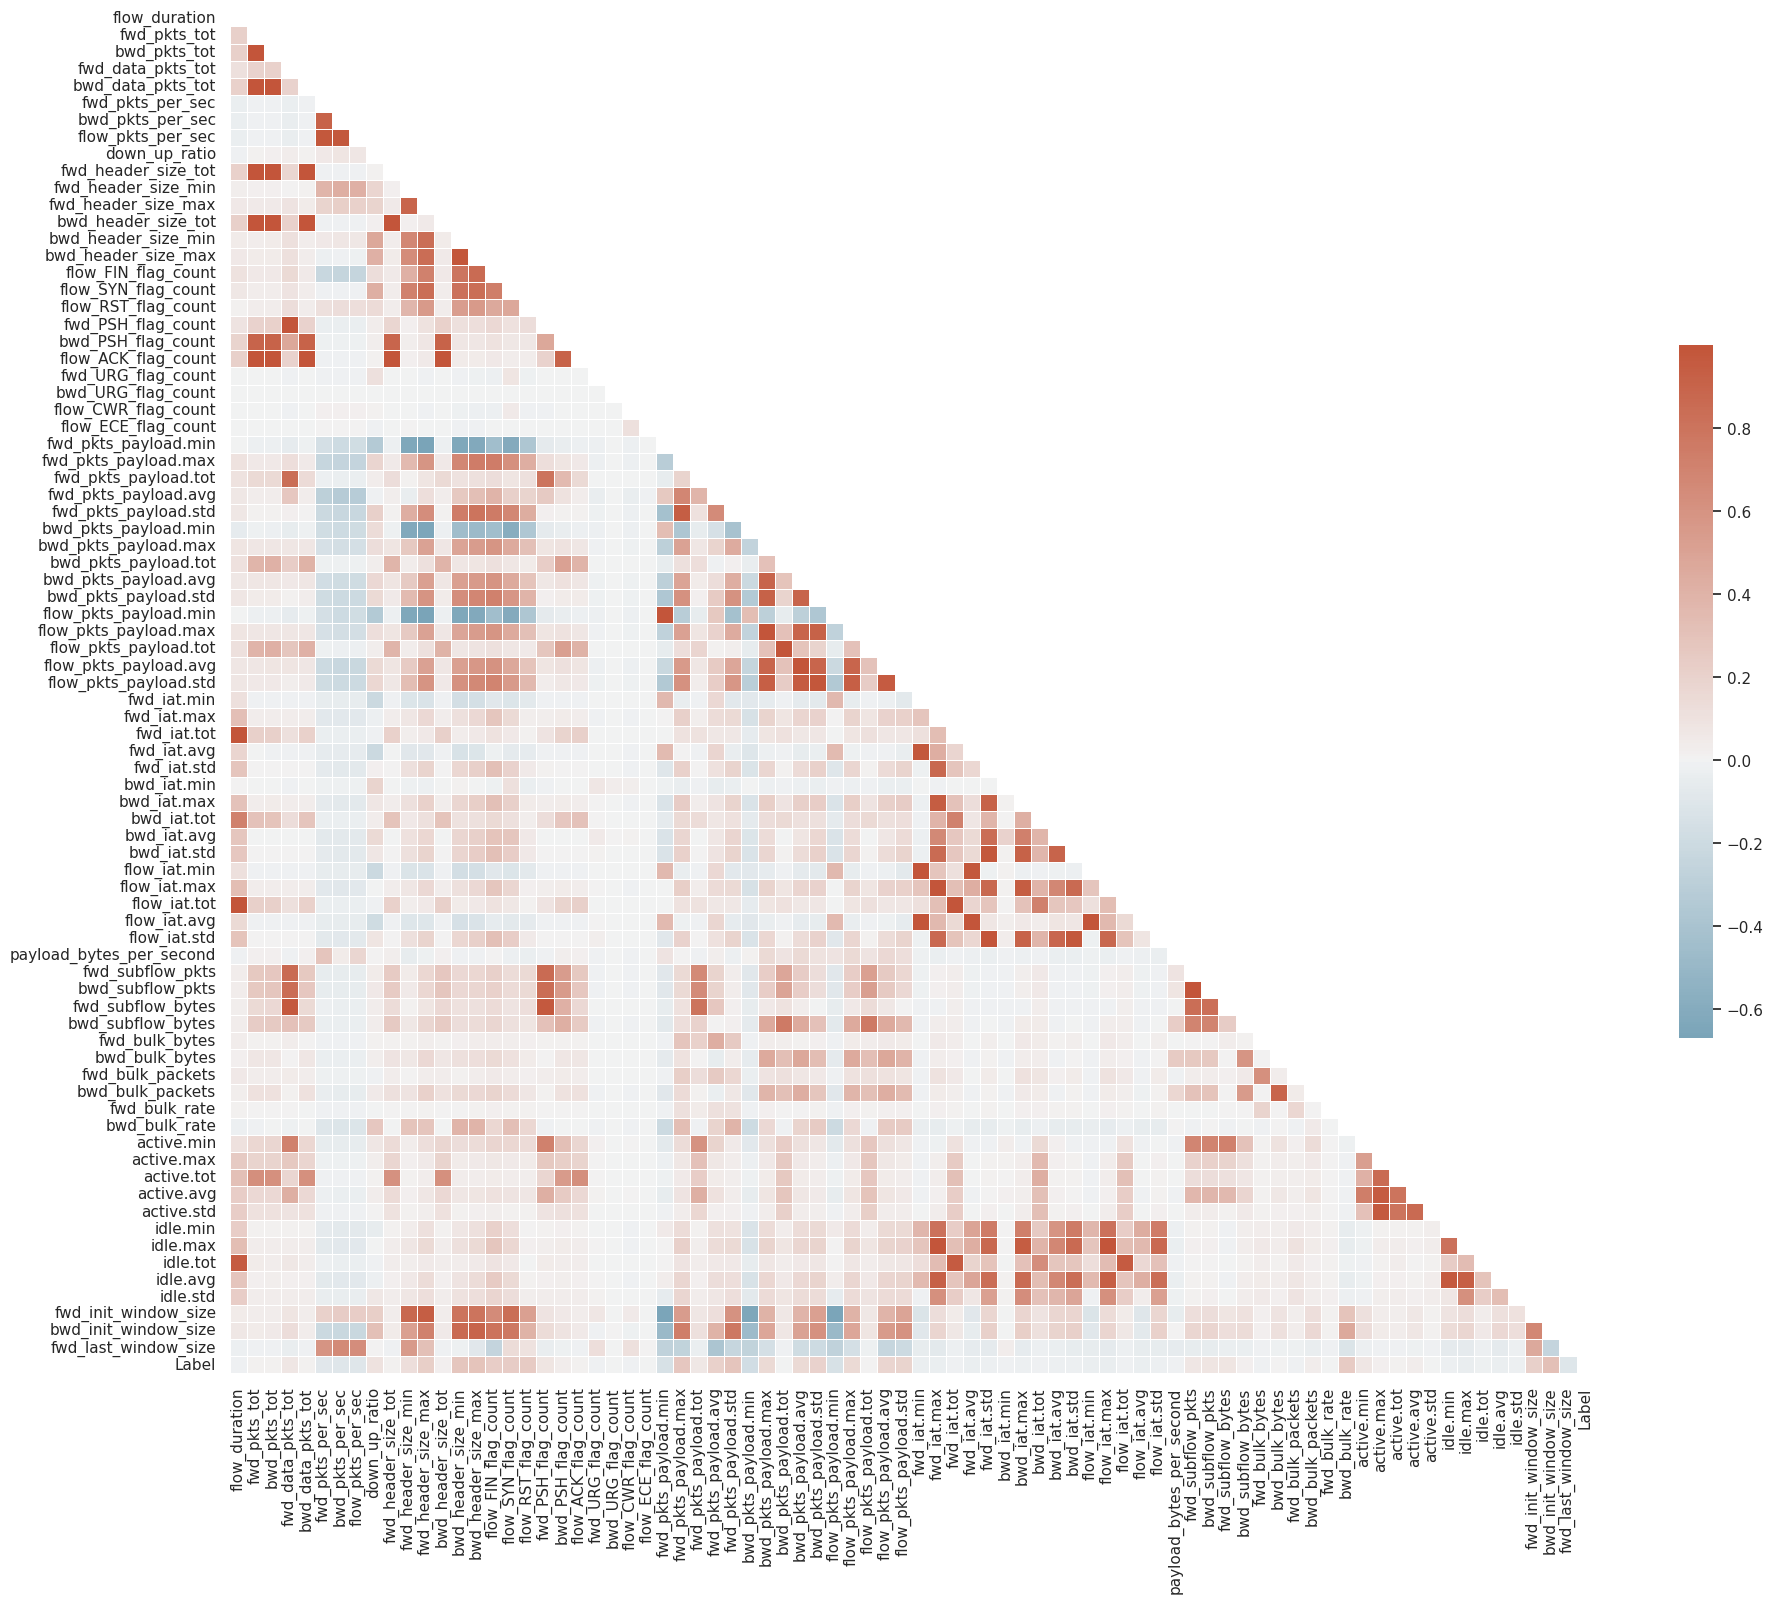

In [28]:
show_corr_matrix(ds)

In [595]:
correlation_matrix = ds.select_dtypes(include=['number','bool']).corr()

In [596]:
# Finding pairs with correlation greater than 0.9
correlation_threshold = 0.97
correlation_pairs = []

# Iterate through the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            )
            correlation_pairs.append(pair)

print(f"Pairs with correlation over {correlation_threshold * 100}%:")
for pair in correlation_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

Pairs with correlation over 97.0%:
fwd_pkts_tot - bwd_pkts_tot: 0.9977736565346315
fwd_pkts_tot - bwd_data_pkts_tot: 0.9981238640834618
fwd_pkts_tot - fwd_header_size_tot: 0.9983024676710928
fwd_pkts_tot - bwd_header_size_tot: 0.9969284507099473
fwd_pkts_tot - flow_ACK_flag_count: 0.9994240451360137
bwd_pkts_tot - bwd_data_pkts_tot: 0.9993969235398683
bwd_pkts_tot - fwd_header_size_tot: 0.9956196867430672
bwd_pkts_tot - bwd_header_size_tot: 0.999059175317736
bwd_pkts_tot - flow_ACK_flag_count: 0.9994481168048883
fwd_data_pkts_tot - fwd_PSH_flag_count: 0.996370720580026
bwd_data_pkts_tot - fwd_header_size_tot: 0.9963652785942658
bwd_data_pkts_tot - bwd_header_size_tot: 0.998580945909404
bwd_data_pkts_tot - flow_ACK_flag_count: 0.9993157051503467
fwd_pkts_per_sec - flow_pkts_per_sec: 0.9745616615733033
bwd_pkts_per_sec - flow_pkts_per_sec: 0.9747202135752829
fwd_header_size_tot - bwd_header_size_tot: 0.9956178586071448
fwd_header_size_tot - flow_ACK_flag_count: 0.9975134625150415
bwd_hea

In [597]:
correlated_features = []
correlation_with_target = []
feature_name = []

for i in correlation_pairs:
    if i[0] not in correlated_features:
        correlated_features.append(i[0])
    if i[1] not in correlated_features:
        correlated_features.append(i[1])

for i in correlated_features:
    correlation_with_target.append(correlation_matrix['Label'][i])
    feature_name.append(i)

correlation_with_target = pd.DataFrame({'Feature': feature_name, 'Correlation': correlation_with_target})
print(correlation_with_target.shape)

(26, 2)


In [598]:
correlation_with_target["Correlation"] = correlation_with_target["Correlation"].abs()
correlation_with_target.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
12,bwd_header_size_max,0.149017
11,bwd_header_size_min,0.135375
16,flow_pkts_payload.max,0.131481
15,bwd_pkts_payload.max,0.131387
7,fwd_PSH_flag_count,0.073178
6,fwd_data_pkts_tot,0.072526
14,flow_pkts_payload.min,0.053423
13,fwd_pkts_payload.min,0.053417
4,bwd_header_size_tot,0.015100
1,bwd_pkts_tot,0.014471


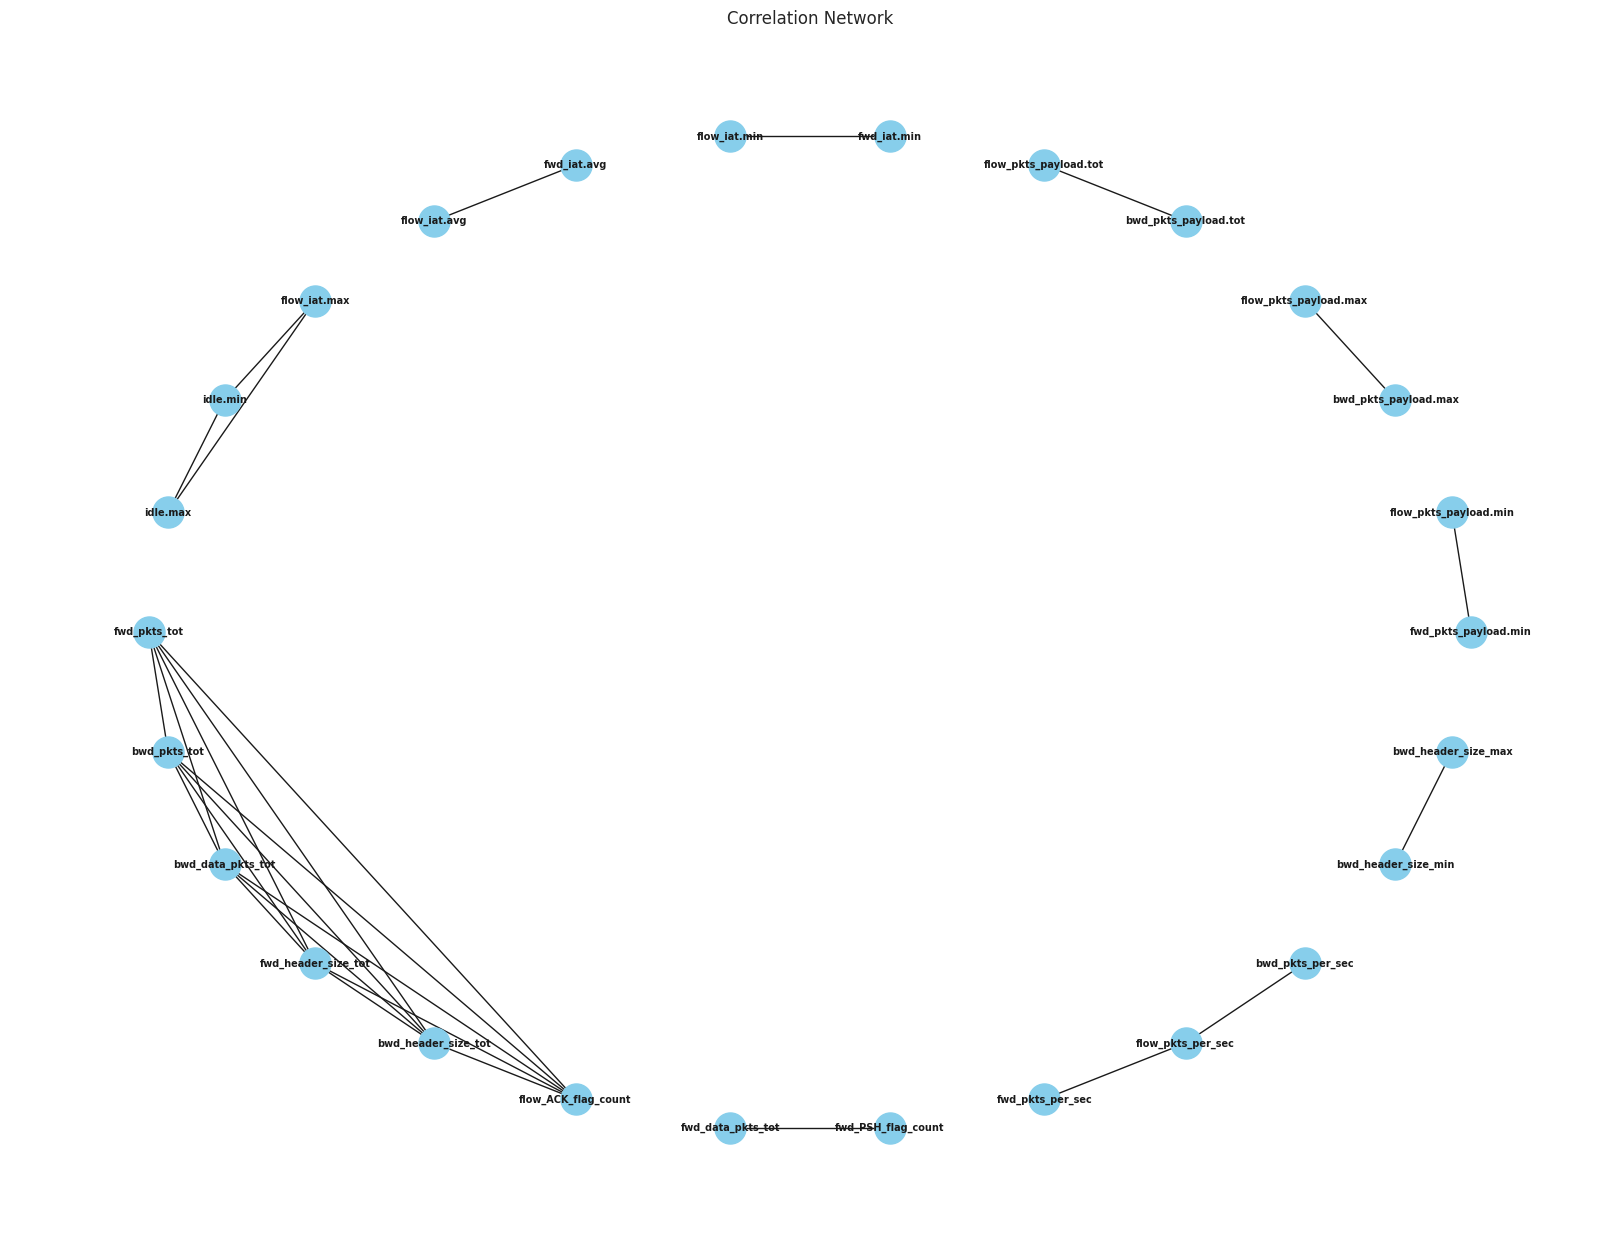

In [599]:
# Create a graph
G = nx.Graph()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

# Visualizing the graph
plt.figure(figsize=(16, 12))
pos = nx.shell_layout(G)  # Positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=7)
plt.title('Correlation Network')
plt.show()

In [600]:
target_feature = 'Label'

feature_to_remove = []

# Finding connected components (clusters of correlated features)
connected_components = list(nx.connected_components(G))

# Analyzing each cluster
for cluster in connected_components:
    cluster = list(cluster)
    print(f"Cluster: {cluster}")
    max_corr = -1
    max_corr_feature = None
    
    for feature in cluster:
        if feature != target_feature:
            correlation_with_target = correlation_matrix.loc[feature, target_feature]
            if abs(correlation_with_target) > max_corr:
                max_corr = abs(correlation_with_target)
                max_corr_feature = feature
    
    print(f"Highest correlated feature with '{target_feature}': {max_corr_feature} (Correlation: {max_corr})")
    cluster.remove(max_corr_feature)
    feature_to_remove.extend(cluster)


Cluster: ['fwd_header_size_tot', 'bwd_header_size_tot', 'bwd_data_pkts_tot', 'flow_ACK_flag_count', 'bwd_pkts_tot', 'fwd_pkts_tot']
Highest correlated feature with 'Label': bwd_header_size_tot (Correlation: 0.015099913865850363)
Cluster: ['fwd_PSH_flag_count', 'fwd_data_pkts_tot']
Highest correlated feature with 'Label': fwd_PSH_flag_count (Correlation: 0.07317797680269945)
Cluster: ['bwd_pkts_per_sec', 'flow_pkts_per_sec', 'fwd_pkts_per_sec']
Highest correlated feature with 'Label': bwd_pkts_per_sec (Correlation: 0.004660033545999704)
Cluster: ['bwd_header_size_max', 'bwd_header_size_min']
Highest correlated feature with 'Label': bwd_header_size_max (Correlation: 0.14901723133291697)
Cluster: ['flow_pkts_payload.min', 'fwd_pkts_payload.min']
Highest correlated feature with 'Label': flow_pkts_payload.min (Correlation: 0.05342264750972606)
Cluster: ['bwd_pkts_payload.max', 'flow_pkts_payload.max']
Highest correlated feature with 'Label': flow_pkts_payload.max (Correlation: 0.13148095919

In [601]:
feature_to_remove

['fwd_header_size_tot',
 'bwd_data_pkts_tot',
 'flow_ACK_flag_count',
 'bwd_pkts_tot',
 'fwd_pkts_tot',
 'fwd_data_pkts_tot',
 'flow_pkts_per_sec',
 'fwd_pkts_per_sec',
 'bwd_header_size_min',
 'fwd_pkts_payload.min',
 'bwd_pkts_payload.max',
 'bwd_pkts_payload.tot',
 'flow_iat.min',
 'flow_iat.avg',
 'flow_iat.max',
 'idle.min']

In [602]:
len(feature_to_remove)

16